
## **Minimum Spanning Tree: Example**

Given a set of N number of 2D points which are locations of residential areas, find a set of connections (edges) forming a power grid such that all points are reachable by the grid and the total edge distance is minimum.



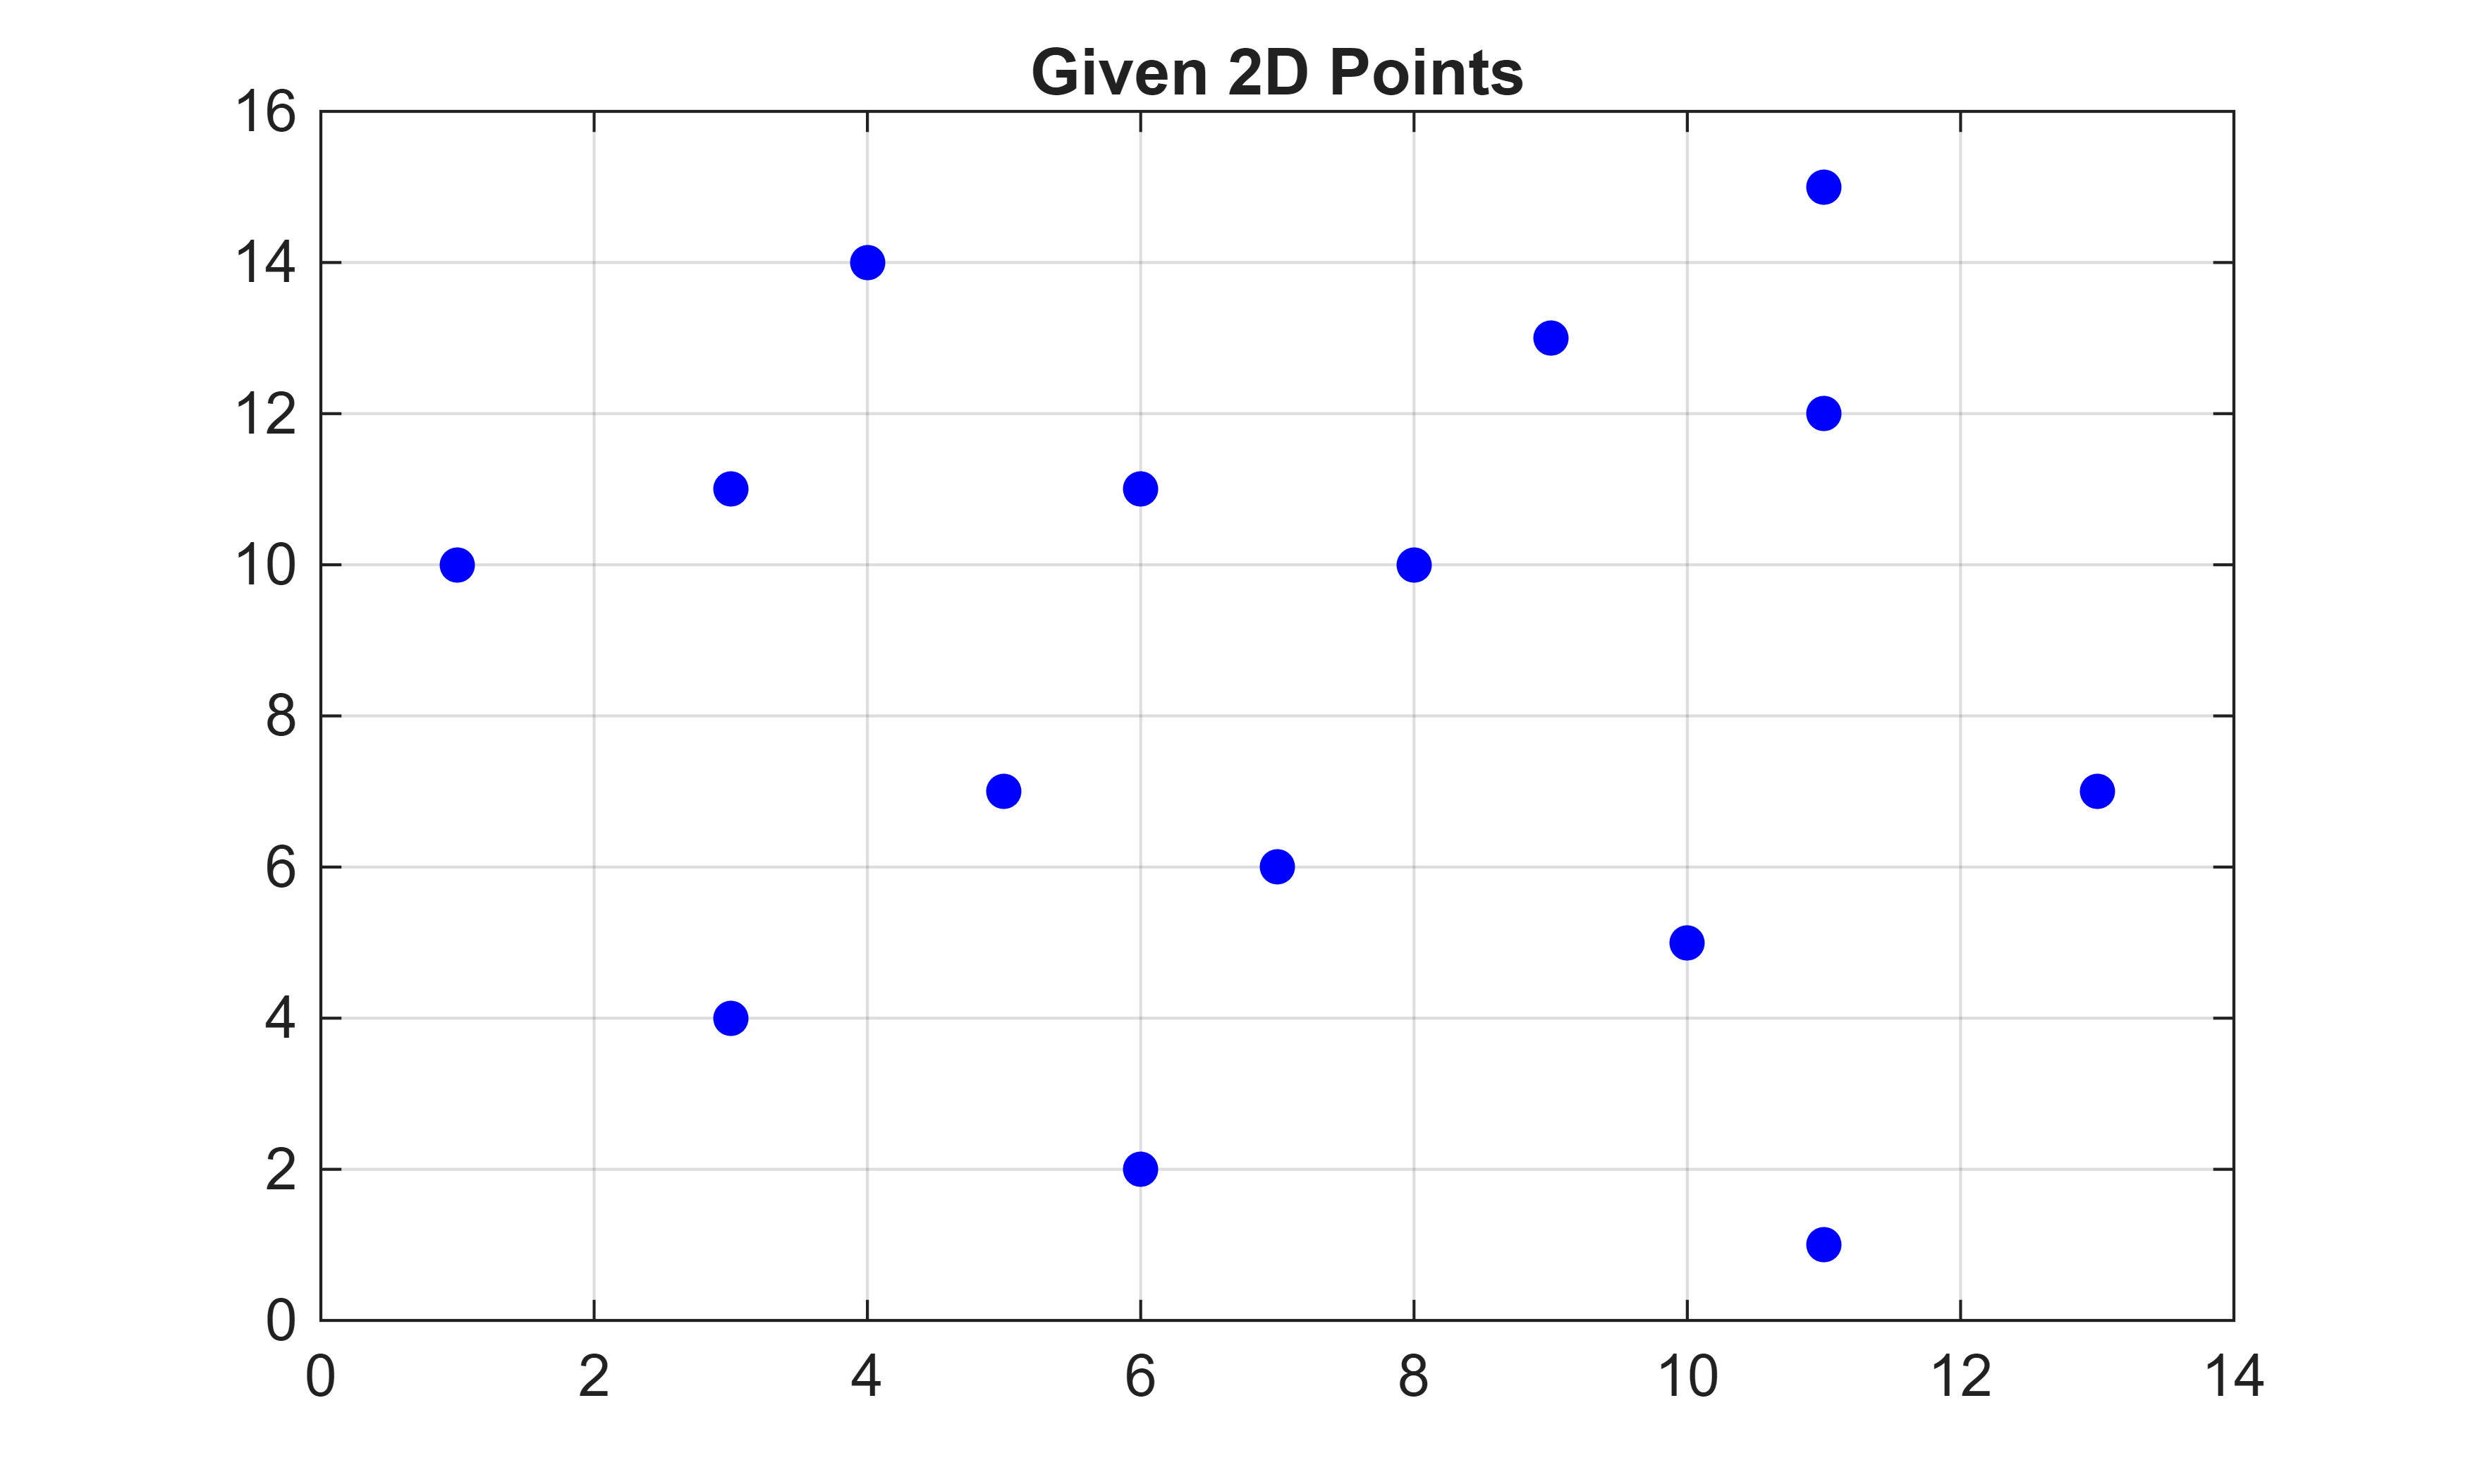

In [1]:
P = [11 15; 4 14; 9 13; 11 12; 3 11; 6 11; 1 10; 8 10; ...
         5 7; 13 7; 7 6; 10 5; 3 4; 6 2; 11 1];

scatter(P(:, 1), P(:, 2), 'b', 'filled');
title('Given 2D Points')
grid on; box on; axis([0 14 0 16]);


Solution using minspantree


In [2]:
[x,y] = meshgrid(1:size(P,1));
G = graph(x(:)',y(:)',hypot(P(x,1)-P(y,1),P(x,2)-P(y,2))');
T = minspantree(G);


Plot the resulting minimum spanning tree against the complete graph.



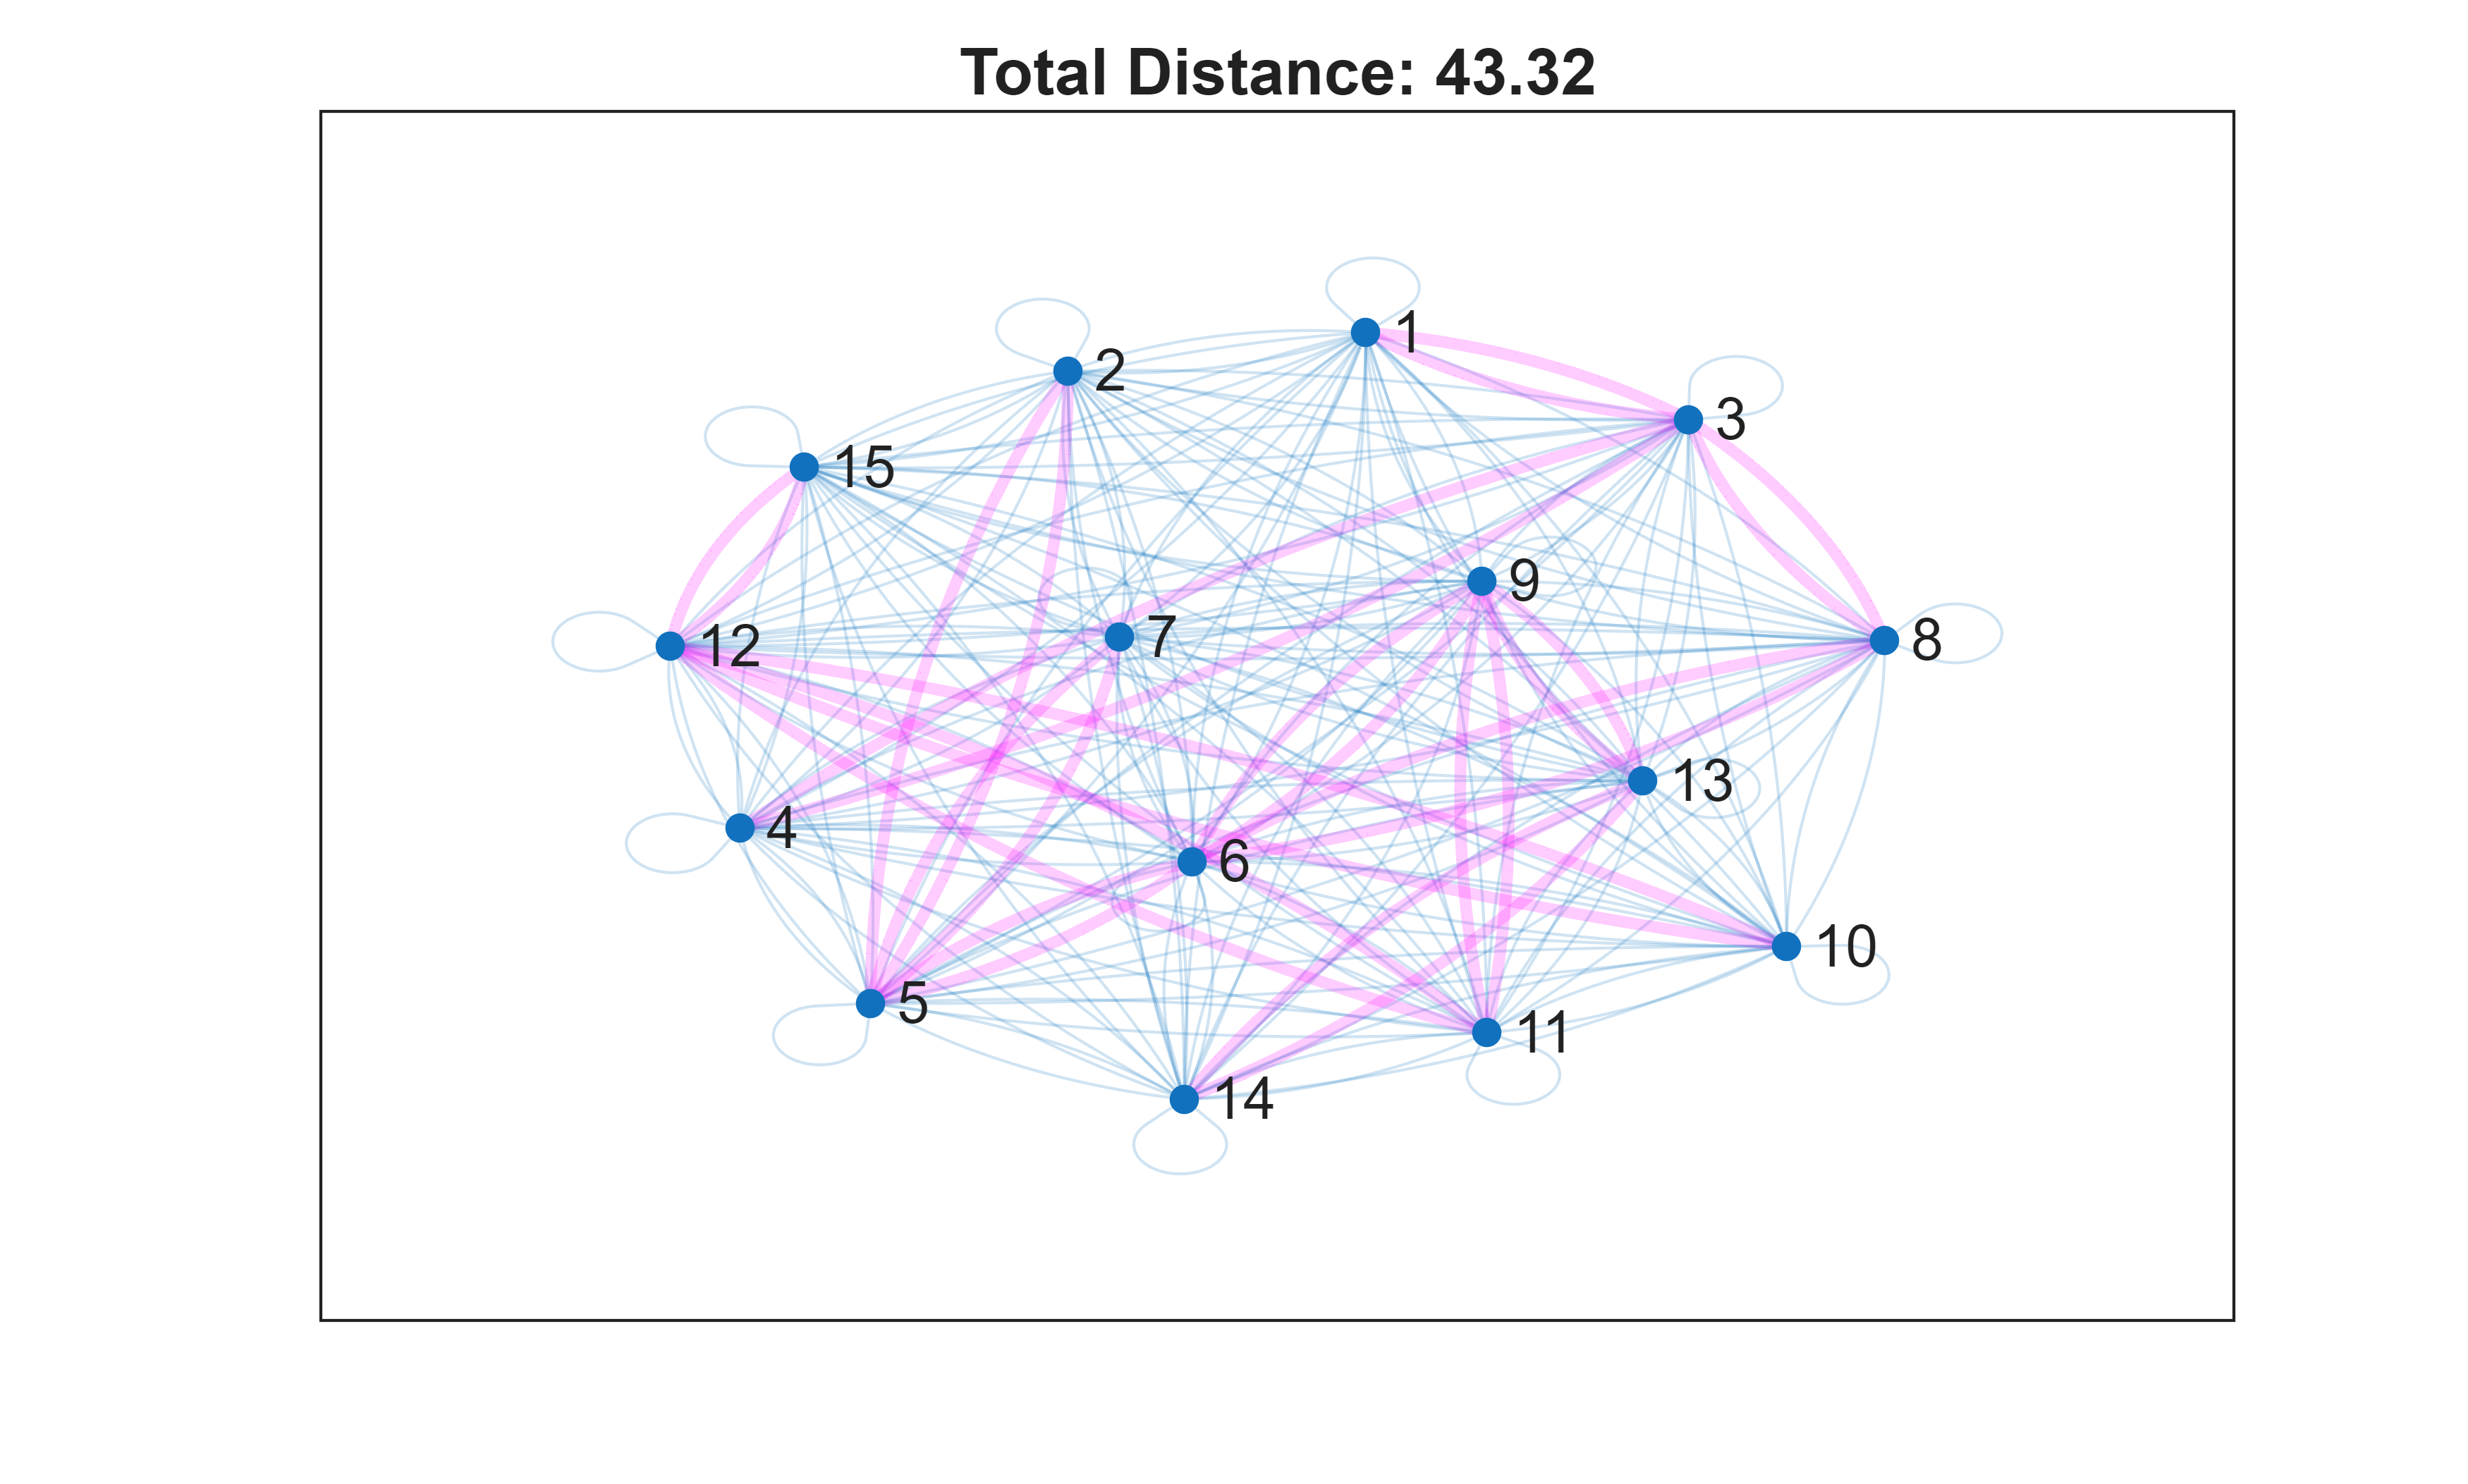

In [3]:
p = plot(G, 'EdgeAlpha',0.2);
highlight(p,T, 'EdgeColor', 'm', 'LineWidth',2);

total_dist = sum(T.Edges.Weight);
title(sprintf('Total Distance: %.2f', total_dist));


Plot the resulting minimum spanning tree in the original locations of points.



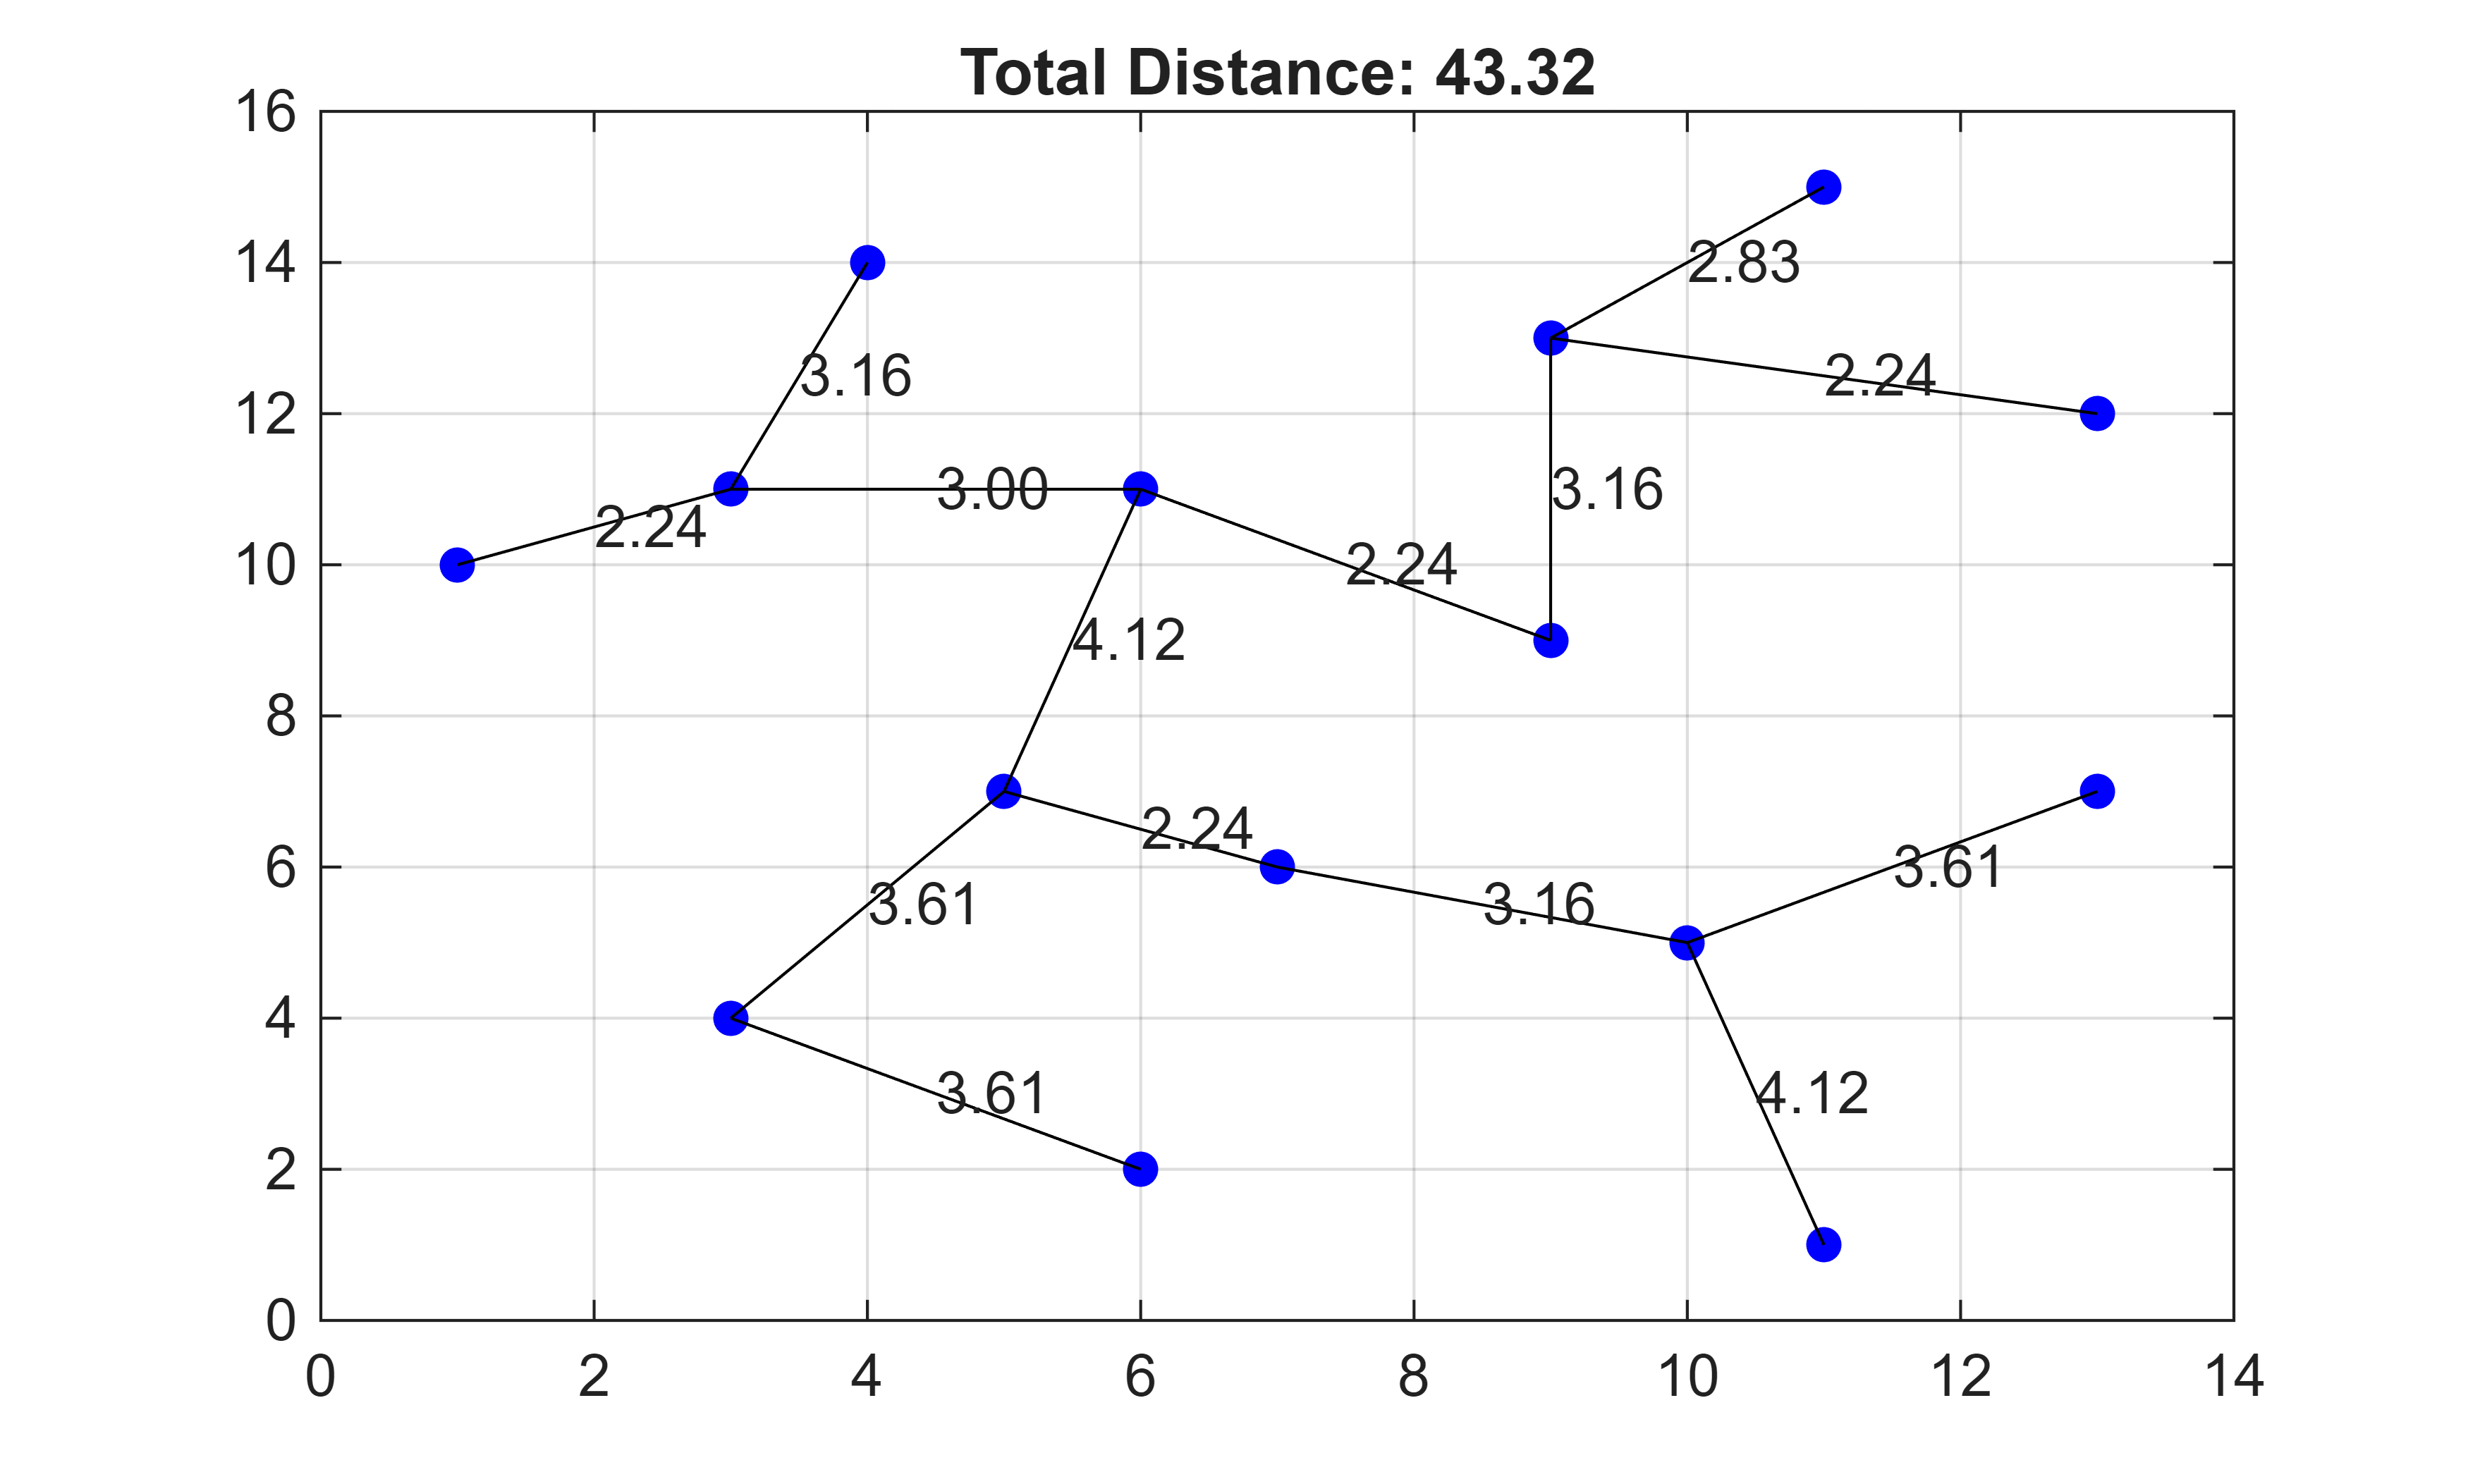

In [4]:
P = [11 15; 4 14; 9 13; 13 12; 3 11; 6 11; 1 10; 9 9; ...
         5 7; 13 7; 7 6; 10 5; 3 4; 6 2; 11 1];

scatter(P(:, 1), P(:, 2), 'b', 'filled'); hold on;
title(sprintf('Total Distance: %.2f', total_dist));
for j = 1:height(T.Edges)
    sp = P(T.Edges.EndNodes(j, 1), :);
    tp = P(T.Edges.EndNodes(j, 2), :);
    plot([sp(1), tp(1)], [sp(2), tp(2)], 'k');
    text(0.5*(sp(1)+tp(1)), 0.5*(sp(2)+tp(2)), ...
        sprintf('%.2f', T.Edges.Weight(j)));
end
hold off; grid on; box on; axis([0 14 0 16]);